In [3]:
# B4B Project File Upload JSON 
#This is my second attempt at processing the same data; now using Pandas and Matplotlib 
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np


In [9]:
# Read JSON file
b4b1000 = pd.read_json("C:\\Users\\Owner\\OneDrive\\Desktop\\b4b_Project\\b4b-1000.json")

# Create dataframe (looks nicer and is easier to work with)
b4b1000df = pd.DataFrame(b4b1000)

#b4b1000df

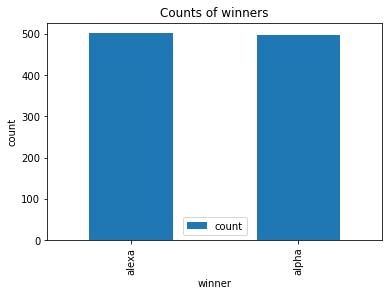

In [18]:
#Formula for finding wins and losses from original data-frame. Will work for data-frames of any size. 
winner_counts = b4b1000df.groupby('winner')['winner'].count().reset_index(name='count')
winner_counts
# Code to plot total winners by count, after making a simple df with the counts per win. 
winner_counts.plot(kind='bar', x='winner', y='count')
plt.xlabel('winner')
plt.ylabel('count')
plt.title('Counts of winners')
plt.show()

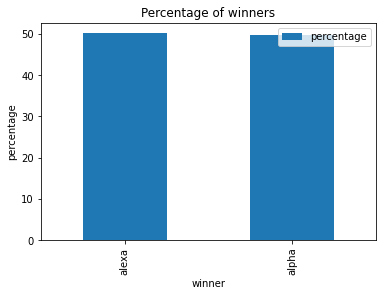

In [20]:
# Same plot as above except with percentages. 
# Formula takes in specific counds per player and divides by total amount of counts then multiplies by 100. 
winner_counts["percentage"] = winner_counts["count"] / winner_counts["count"].sum() * 100
winner_counts.plot(kind='bar', x='winner', y='percentage')
plt.xlabel('winner')
plt.ylabel('percentage')
plt.title('Percentage of winners')
plt.show()

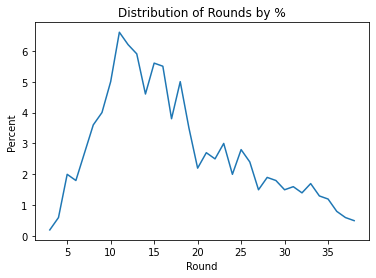

In [22]:
# The mean amount of rounds it takes to finish a game. 
overall_mean_rounds = b4b1000df['round'].mean()
round_counts = b4b1000df.groupby('round')['round'].count().reset_index(name='count')
total_count_of_rounds = round_counts['count'].sum()
round_counts['percent'] = round_counts['count'] / total_count_of_rounds * 100
# plt.plot plots a continuous line graph. 
plt.plot(round_counts['round'], round_counts['percent'])
plt.xlabel('Round')
plt.ylabel('Percent')
plt.title('Distribution of Rounds by %')
plt.show()


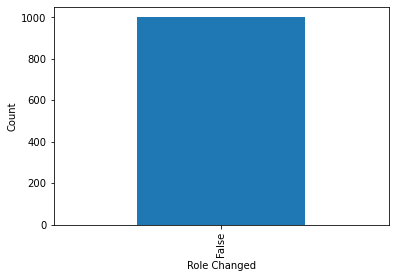

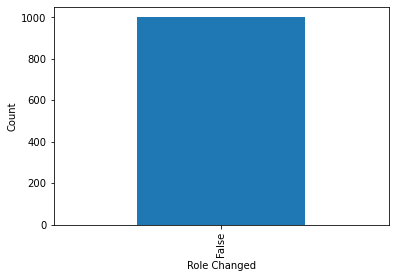

In [10]:
#Role Comparison. Comparing two columns to see if the roles have changed from the beginning of the game till the end. 
#It was a little more complicated to compare the roles without making a new column extracting the roles from the nested 
# dictionary. So I will compare the two columns I made to check if the roles remained throughout the game. 
#The lambda function takes in each element of the column (a dictionary) and returns the value 
# of the key for example. "players" -> "alexa" -> "role" -> "role".
b4b1000df["final_alpha_role"] = b4b1000df["players"].apply(lambda x: x["alpha"]["role"]["role"])
b4b1000df["final_alexa_role"] = b4b1000df["players"].apply(lambda x: x["alexa"]["role"]["role"])
b4b1000df["starting_alpha_role"] = b4b1000df["seed"].apply(lambda x: x["players"]["alpha"]["role"]["role"])
b4b1000df["starting_alexa_role"] = b4b1000df["seed"].apply(lambda x: x["players"]["alexa"]["role"]["role"])

# Example of getting just one of the initial players roles.b4b1000df["seed"][1]["players"]["alexa"]["role"]["role"]

# This is the comparison of columns (axis = 1) with a lambda function that creates a new column and asks if the columns don't
# match make the column a True Statement which means the roles DID change. 
# In these examples none of the rows changed because the simulation wasn't set up for that, but here is the code for when 
# that part of the game is ready. 

b4b1000df["role_changed_alpha"] = b4b1000df.apply(lambda x: x["starting_alpha_role"] != x["final_alpha_role"], axis=1)
b4b1000df["role_changed_alexa"] = b4b1000df.apply(lambda x: x["starting_alexa_role"] != x["final_alexa_role"], axis=1)

# To plot this I need the counts of True and False values
alexa_role_change_counts = b4b1000df['role_changed_alexa'].value_counts()
# Create a bar chart for alexa
alexa_role_change_counts.plot(kind='bar')
plt.xlabel('Role Changed')
plt.ylabel('Count')
plt.show()

# Same for alpha
alpha_role_change_counts = b4b1000df['role_changed_alpha'].value_counts()
# Create a bar chart for alexa
alpha_role_change_counts.plot(kind='bar')
plt.xlabel('Role Changed')
plt.ylabel('Count')
plt.show()

#b4b1000df

In [47]:
# Checking the length of a simulation. 
# Made two new columns with the time stamp in milliseconds that will later be compared to the time stamp at the end of the 
# game. 
# Can Only run once as the indexes of the milliseconds change every time the code is ran. If It messes up just run the 
# original block with the main df in it at the top. 
# b4b1000df["gameStartedMilli"] = b4b1000df["gameStarted"].str[-7:-1]
# b4b1000df["gameEndedMilli"] = b4b1000df["gameEnded"].str[-7:-1]

#Need to convert the datatype to numeric to do operations with the numbers 

b4b1000df["gameStartedMilli"] = pd.to_numeric(b4b1000df["gameStartedMilli"])
b4b1000df["gameEndedMilli"] = pd.to_numeric(b4b1000df["gameEndedMilli"])

#Used a lambda function to compare and subtract one column from the other for each row in the dataframe. 

b4b1000df["length_of_game"] = b4b1000df.apply(lambda x: x["gameEndedMilli"] - x["gameStartedMilli"], axis=1)

# After making the length of game column you can use the .describe() method to tell you different statistics
# about that column. 

b4b1000df["length_of_game"].describe()


count    1000.000000
mean        0.014532
std         0.011133
min         0.001000
25%         0.007000
50%         0.011000
75%         0.019000
max         0.099000
Name: length_of_game, dtype: float64

In [11]:
# What booties do players (Alexa and Alpha) have at the end of a match, and comparing that to a winning game 
# vs. a losing game.
# Start by filtering df by winner. 
import json
from pandas.io.json import json_normalize
pd.options.display.max_rows = None
alexa_win = b4b1000df[b4b1000df['winner'] == "alexa"] 
alpha_win = b4b1000df[b4b1000df['winner'] == "alpha"] 
# alexas_booties = alexa_win["players"]
# (winner_alexa$players$alexa$booties))


In [185]:
#Parsing through this data was more complicated than expected. I began by isolating the dictionaries in the players column.
dicts_in_alexasWin = [x for x in alexa_win['players'] if type(x) == dict]
#I iterated through the dictionaries and found only keys with the value alexa. 
alexa_keys = [d["alexa"] for d in dicts_in_alexasWin if "alexa" in d]
#Did the same thing, but with values for booties
alexas_win_booties = [d["booties"] for d in alexa_keys if "booties" in d]
#The resulting column contains a list of list with all the booties
# Check the datatype to properly count the occurrences of each of the individual booties. 
print(type(alexas_win_booties))

<class 'list'>


In [184]:
# Flatten the list of lists, using two for loops to iterate through the sublist and append each item
# to the flat_alexas_win_booties list (Just a regular list). 
flat_alexas_win_booties = []
for sublist in alexas_win_booties:
    for item in sublist:
        flat_alexas_win_booties.append(item)
# flat_alexas_win_booties
# Create a pandas Series from the flat list so I can use the pandas tools. 
booties_series = pd.Series(flat_alexas_win_booties)
# Get the counts of each variable using value_counts()
booties_counts = booties_series.value_counts()
# Convert the counts to a dataframe 
alexa_wins_booties_counts_df = booties_counts.to_frame().reset_index()
# Rename the columns
alexa_wins_booties_counts_df.columns = ['booties', 'count']

print(alexa_wins_booties_counts_df)


    booties  count
0   CUTLASS    414
1      DICE    313
2      RING    299
3   COMPASS    296
4      HELM    272
5  SPYGLASS    264
6    AMULET    255


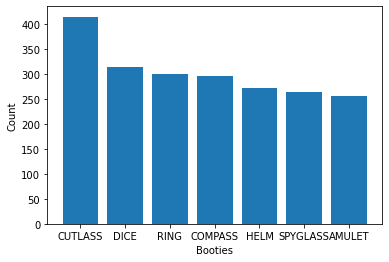

In [186]:
#Plot the chart! 
plt.bar(alexa_wins_booties_counts_df['booties'], alexa_wins_booties_counts_df['count'])
plt.xlabel('Booties')
plt.ylabel('Count')
plt.show()

In [17]:
#How many events on average are there per game? 
#I'm going to upload a smaller df to work with on this next part. # Read JSON file
b4b10 = pd.read_json("C:\\Users\\Owner\\OneDrive\\Desktop\\b4b_Project\\b4b-10.json")
# Create dataframe
b4b10df = pd.DataFrame(b4b10)
# b4b10df["events"][1]

In [190]:
#The function below is used to access the values in the eventNumber dictionary for each row. 
# It then makes a list of each of the events
#Essencially finding the total amount of events that took place in every simulation of a game. 

def find_max_event_number(row):
    event_numbers = []
    for dic in row:
        if "eventNumber" in dic:
            event_numbers.append(dic["eventNumber"])
    return max(event_numbers)
        

#Created a new column called max_event_number put all the max number in. 

b4b10df["max_event_number"] = b4b10df["events"].apply(find_max_event_number)
b4b10df["max_event_number"]

#Good time for a .describe()
b4b10df["max_event_number"].describe()


count     10.000000
mean     143.200000
std       70.817135
min       33.000000
25%      100.750000
50%      144.500000
75%      189.000000
max      241.000000
Name: max_event_number, dtype: float64

In [167]:
b4b10df["events"][0][0]["type"]

'Game Started'

In [19]:
#Needed to create a function that loops threw each index in the dictionary. i.e. ["events"][0][0]["type"],
# b4b10df["events"][0][1]["type"], b4b10df["events"][0][2]["type"], b4b10df["events"][0][3]["type"]. 
# Till the end of the sublist and then move to the next index in the mother list ie. 
# b4b10df["events"][1][0]["type"], b4b10df["events"][1][1]["type"], b4b10df["events"][1][2]["type"].
#Appending all of the values at those indexes to the event_type list where I can do a count of each individual event. 
def extract_event_types(df):
    event_types = []
    for events_list in df["events"]:
        for event_dict in events_list:
            if "type" in event_dict:
                event_types.append(event_dict["type"])
    return event_types

event_types_list = extract_event_types(b4b10df)
# print(event_types_list)

In [171]:
from collections import Counter
#This function counts all of the instances and their count in a dictionary like format called a collections counter object
events_counter = Counter(event_types_list)
type(events_counter)
#I need to turn this collections counter object to a df in order to work through it. 
events_counterdf = pd.DataFrame.from_dict(events_counter, orient='index', columns=['count'])
events_counterdf

,count
Game Started,10
Turn Started,420
Cutlass Triggered,29
Turn Ended,410
Booty Mystery Bought,81
Amulet Triggered,35
Compass Triggered,27
Navigation Started,65
Siren Spied,47
Game Ended,10


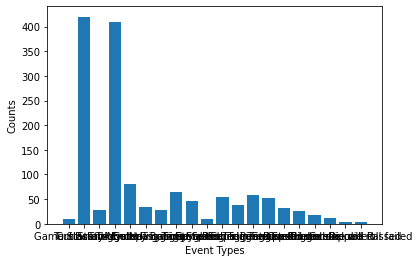

In [176]:
#Tried to plot this and it was absolute chaos in the x axis. It is better to look at through the DF above. 
plt.bar(events_counterdf.index, events_counterdf["count"])
plt.xlabel('Event Types')
plt.ylabel('Counts')
plt.show()